# 豆瓣电影TOP250数据分析

## 一、数据导入

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

#配置中文字体和修改字体大小
matplotlib.rcParams['font.family'] = 'SimHei'
matplotlib.rcParams['font.size'] = 20

In [59]:
df = pd.read_csv("top250_movie.csv",encoding = 'utf-8')
df.head()

,0,名称,年份,国家,类型,导演,评价人数,评分
0,1,肖申克的救赎,1994,美国,犯罪 剧情,弗兰克·德拉邦特 Frank Darabont,1111833,9.6
1,2,霸王别姬,1993,中国大陆 香港,剧情 爱情 同性,陈凯歌 Kaige Chen,811410,9.5
2,3,这个杀手不太冷,1994,法国,剧情 动作 犯罪,吕克·贝松 Luc Besson,1030489,9.4
3,4,阿甘正传,1994,美国,剧情 爱情,Robert Zemeckis,878944,9.4
4,5,美丽人生,1997,意大利,剧情 喜剧 爱情 战争,罗伯托·贝尼尼 Roberto Benigni,513037,9.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
0       250 non-null int64
名称      250 non-null object
年份      250 non-null object
国家      250 non-null object
类型      250 non-null object
导演      250 non-null object
评价人数    250 non-null int64
评分      250 non-null float64
dtypes: float64(1), int64(2), object(5)
memory usage: 15.7+ KB


## 二、重复值检查  

In [5]:
df.duplicated().value_counts()

False    250
dtype: int64

In [6]:
len(df.名称.unique())

250

从结果可以看出，没有重复项也没有重名的电影。

## 三、数据分析
### 1、电影上映年份分析

In [20]:
df["年份"].value_counts().head()

2010    13
2004    12
2001    11
1994    11
2009    10
Name: 年份, dtype: int64

**注意：value_counts()是Series的方法，DataFrame()并没有这个方法。**

### 2、电影制作国家分析  

- **关于pandas中的str列内置方法的详细介绍见：[Pandas str列内置方法](https://blog.csdn.net/dta0502/article/details/81839048)**
- **apply函数的使用参考：[Pandas最好用的函数——Apply](https://blog.csdn.net/dta0502/article/details/81840078)。**

#### (1) 参数的处理---转换为列表格式
有些电影由多个国家或地区联合制作的。  

In [53]:
country = df["国家"].str.split(' ')
country.head(10)

0          [美国]
1    [中国大陆, 香港]
2          [法国]
3          [美国]
4         [意大利]
5          [美国]
6          [日本]
7          [美国]
8      [美国, 英国]
9          [美国]
Name: 国家, dtype: object

#### (2)参数的处理---转换为Pandas Series格式

In [55]:
country = df["国家"].str.split(' ',expand = True).apply(pd.Series)
country.head()

,0,1,2,3,4
0,美国,None,None,None,None
1,中国大陆,香港,None,None,None
2,法国,None,None,None,None
3,美国,None,None,None,None
4,意大利,None,None,None,None


我们可以看到，有些电影甚至有5个国家或地区参与制作。

#### (3)空白值填补
上面的DataFrame有很多空值，对于这么多的空值，可以通过先按列计数，将空值 NaN 替换为“0”，再按行汇总。最后我们统计每个区域里相同国家的总数。

In [56]:
all_country = country.apply(pd.value_counts).fillna(0)
all_country.head()

,0,1,2,3,4
中国大陆,11.0,5.0,0.0,0.0,0.0
丹麦,1.0,0.0,0.0,0.0,0.0
伊朗,2.0,0.0,0.0,0.0,0.0
冰岛,0.0,0.0,0.0,1.0,0.0
加拿大,0.0,5.0,1.0,1.0,0.0


#### (4)总数统计
接下来我们可以计算每个国家参与制作电影总数排名情况：

In [57]:
all_country = country.apply(pd.value_counts).fillna('0')
all_country.columns = ['area1','area2','area3','area4','area5']
all_country['area1'] = all_country['area1'].astype(int)
all_country['area2'] = all_country['area2'].astype(int)
all_country['area3'] = all_country['area3'].astype(int)
all_country['area4'] = all_country['area4'].astype(int)
all_country['area5'] = all_country['area5'].astype(int)
all_country.head()

,area1,area2,area3,area4,area5
中国大陆,11,5,0,0,0
丹麦,1,0,0,0,0
伊朗,2,0,0,0,0
冰岛,0,0,0,1,0
加拿大,0,5,1,1,0


In [58]:
all_country['all_counts'] = all_country['area1']+all_country['area2']+all_country['area3']+all_country['area4']+all_country['area5']
#降序
all_country.sort_values(['all_counts'],inplace = True,ascending=False)
all_country.head()

,area1,area2,area3,area4,area5,all_counts
美国,122,14,2,5,0,143
英国,14,14,6,0,0,34
日本,31,2,0,0,0,33
香港,19,6,0,0,0,25
法国,11,10,2,1,0,24


pandas排序的方法有很多，sort_values表示根据某一列排序:
```python
pd.sort_values("xxx",inplace=True)
```
表示pd按照xxx这个字段排序，inplace默认为False,如果该值为False，那么原来的pd顺序没变，只是返回的是排序的。

### 3、电影类型分析
#### (1) 参数的处理---转换为列表格式

In [22]:
all_type = df['类型'].str.split(' ').apply(pd.Series)
all_type.head(10)

,0,1,2,3,4
0,犯罪,剧情,NaN,NaN,NaN
1,剧情,爱情,同性,NaN,NaN
2,剧情,动作,犯罪,NaN,NaN
3,剧情,爱情,NaN,NaN,NaN
4,剧情,喜剧,爱情,战争,NaN
5,剧情,爱情,灾难,NaN,NaN
6,剧情,动画,奇幻,NaN,NaN
7,剧情,历史,战争,NaN,NaN
8,剧情,科幻,悬疑,冒险,NaN
9,爱情,科幻,动画,冒险,NaN


#### (2)总数统计

In [25]:
all_type = df['类型'].str.split(' ').apply(pd.Series)
all_type = all_type.apply(pd.value_counts).fillna('0')
all_type.columns = ['tpye1','type2','type3','type4','type5']
all_type['tpye1'] = all_type['tpye1'].astype(int)
all_type['type2'] = all_type['type2'].astype(int)
all_type['type3'] = all_type['type3'].astype(int)
all_type['type4'] = all_type['type4'].astype(int)
all_type['type5'] = all_type['type5'].astype(int)
all_type.head(10)

all_type['all_counts'] = all_type['tpye1']+all_type['type2']+all_type['type3']+all_type['type4']+all_type['type5']

all_type = all_type.sort_values(['all_counts'],ascending=False)
all_type.head(10)

,tpye1,type2,type3,type4,type5,all_counts
剧情,164,25,5,0,0,194
爱情,2,37,19,0,0,58
喜剧,25,21,0,0,0,46
冒险,6,4,18,15,2,45
犯罪,14,22,6,3,0,45
惊悚,0,7,16,11,2,36
悬疑,2,16,14,1,0,33
动画,12,12,6,2,0,32
奇幻,1,12,17,2,0,32
动作,14,13,3,0,0,30


### 4、上榜次数最多的导演

Series转DataFrame可以使用字典的方式。

In [28]:
director = df['导演'].value_counts() #value_counts()返回一个Series 序列
director.head()

 宫崎骏 Hayao Miyazaki            7
 克里斯托弗·诺兰 Christopher Nolan    7
 史蒂文·斯皮尔伯格 Steven Spielberg    5
 王家卫 Kar Wai Wong              5
 大卫·芬奇 David Fincher           4
Name: 导演, dtype: int64

In [31]:
# director.index 可以查看下标 
# director.values 可以查看值
myDirector = pd.DataFrame({'name':director.index,'counts':director.values}) 
myDirector.head(10)

,name,counts
0,宫崎骏 Hayao Miyazaki,7
1,克里斯托弗·诺兰 Christopher Nolan,7
2,史蒂文·斯皮尔伯格 Steven Spielberg,5
3,王家卫 Kar Wai Wong,5
4,大卫·芬奇 David Fincher,4
5,李安 Ang Lee,4
6,理查德·林克莱特 Richard Linklater,3
7,詹姆斯·卡梅隆 James Cameron,3
8,姜文 Wen Jiang,3
9,是枝裕和 Hirokazu Koreeda,3


### 5、评分和排名的关系可视化

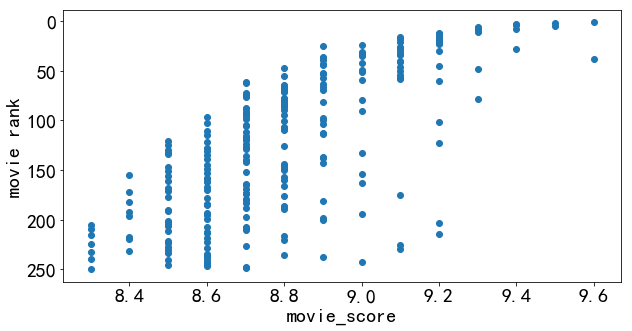

In [42]:
plt.figure(figsize=(10,5))
plt.scatter(df['评分'],df['0'])
plt.xlabel('movie_score')
plt.ylabel('movie rank')
#修改y轴为倒序
plt.gca().invert_yaxis()

(array([ 7.,  8., 26., 36., 46., 38., 25., 15., 18., 16.,  7.,  4.,  2.,
         2.]),
 array([8.3       , 8.39285714, 8.48571429, 8.57857143, 8.67142857,
        8.76428571, 8.85714286, 8.95      , 9.04285714, 9.13571429,
        9.22857143, 9.32142857, 9.41428571, 9.50714286, 9.6       ]),
 <a list of 14 Patch objects>)

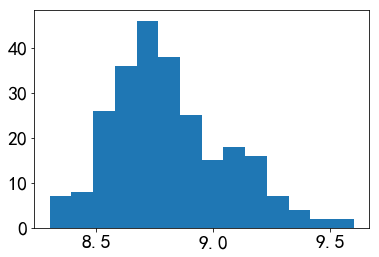

In [61]:
#集中趋势的直方图
plt.hist(df['评分'],bins=14)

In [38]:
#电影排名和评分的相关性检测
df['评分'].corr(df['0'])

-0.7018588501753789

## 参考
- [使用python抓取豆瓣top250电影数据进行分析](https://www.jianshu.com/p/720b193a5c2b#)
- [Pandas str列内置方法](https://blog.csdn.net/dta0502/article/details/81839048)
- [Pandas最好用的函数——Apply](https://blog.csdn.net/dta0502/article/details/81840078)